This file implement an FER baseline model, using SVM. Adapted from https://github.com/whimian/SVM-Image-Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.transform import resize
from sklearn.utils.multiclass import unique_labels
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
def load_image_files(path_to_dir, dimension=(64, 64)):
    image_dir = Path(path_to_dir)
    folders = [dir for dir in image_dir.iterdir() if dir.is_dir()]
    categories = [f.name for f in folders]

    descr = "imgae dataset categorized"
    target = []
    flat_data = []
    images = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
train_set = load_image_files("set_v_3500/dataset_valid")

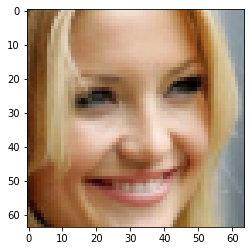

In [60]:
#print(train_set)
img = train_set['images'][1700]
#print(img)
imgplot = plt.imshow(img)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
train_set.data, train_set.target, test_size=0.4,random_state=999)

X_train, X_test, y_train, y_test = train_test_split(
    train_set.data, train_set.target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)
#X_train = train_set.data
#y_train = train_set.target

In [52]:

#clf = svm.SVC(C = 100, cache_size=7000, kernel = 'linear')
#clf = svm.LinearSVR(C = 100, random_state = 0)

#param_grid = [
#    {'C': [1, 10, 100, 1000]},
# ]

#clf = GridSearchCV(svc, param_grid)
#clf.fit(X_train, y_train)
#clf.fit(X_train, y_train)


In [21]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_jobs=2, random_state=99, n_estimators = 100)
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=99, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.31      0.34      0.33       102
           1       0.26      0.23      0.25        99
           2       0.18      0.12      0.15       107
           3       0.38      0.55      0.45       103
           4       0.27      0.19      0.22       101
           5       0.17      0.23      0.19        87
           6       0.24      0.21      0.22       101

    accuracy                           0.2

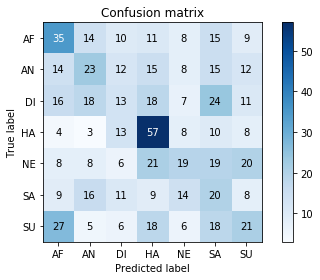

In [35]:
#test_set = load_image_files("base_img/val")
#X_test = test_set.data
#y_test = test_set.target
y_pred = rdf.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (rdf, metrics.classification_report(y_test, y_pred)))

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = ['','AF','AN','DI', 'HA','NE','SA','SU']
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')
plt.show()

Afraid = AF
Angry = AN
Disgust = DI
Happy = HA
Neutral = NE
Sad = SA
Surprise = SU
Actual (predicted)


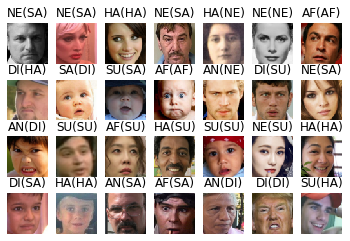

In [51]:
#new_test = load_image_files("base_img/val")
#imgplot = plt.imshow(new_test['images'][0])
prediction = rdf.predict(X_test)
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['AF','AN','DI', 'HA','NE','SA','SU']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])
print("Actual (predicted)")
k = 0
c = 4
r = 7
rand_list = random.sample(range(len(y_test)), r*c)
for i in rand_list:
    plt.subplot(c, r, k+1)
    plt.title(abbr[y_test[i]] + "(" + abbr[prediction[i]]+ ")")
    plt.axis('off')
    x_copy = X_test[i]
    plt.imshow(x_copy.reshape(64,64,3))
    k+=1


Afraid = AF
Angry = AN
Disgust = DI
Happy = HA
Neutral = NE
Sad = SA
Surprise = SU
Actual (predicted)


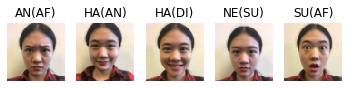

In [45]:
new_test = load_image_files("base_img/new_test")
#imgplot = plt.imshow(new_test['images'][0])
prediction = rdf.predict((new_test.data))
#print(new_test)
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['AF','AN','DI', 'HA','NE','SA','SU']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])

print("Actual (predicted)")
#print(len(new_test['images']))
for i in range(len(new_test['images'])):
    plt.subplot(1, 5, i+1)
    plt.title(new_test.target_names[new_test.target[i]] + "(" + abbr[prediction[i]]+ ")")
    plt.axis('off')
    plt.imshow(new_test['images'][i])